# Principal Component Analysis (PCA) with Python Code

1. Theory
2. Coding
3. Exercise

# Theory

Principle component analysis is a technique used in machine learning to reduce dimension.

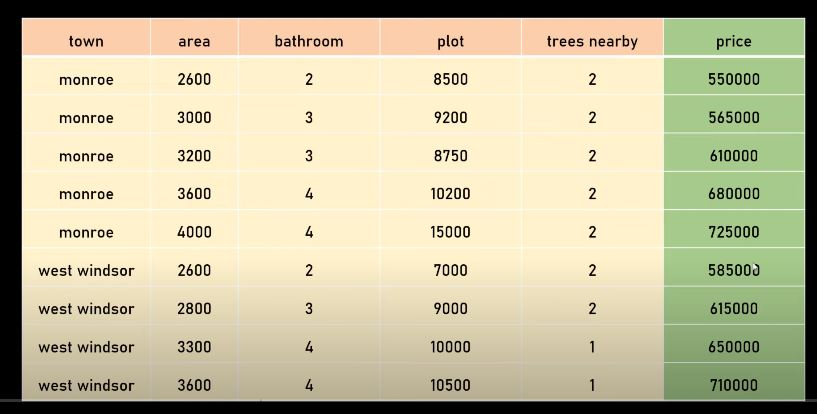

Lets assume we are working on building a machine learning model to predict property pricec. Here all the columns on the left hand side are the features or the attributes of the property that decides the price. So the colum in green is actually our target variable. We probably already know that the price of the home is mainly dependent on area in which town it is in, plot etc. It depends on how many bathrooms we have in a property but not as much. Eg. 2600 square feet home with 2 bathrooms versus 3 bathrooms, price would be not that different but if we go from 2600 to 3000 sqrft the price will be significantly different, So clearly area plot plays a more important role in determining the last price, bathrooms plays a little bit role and how much this particular column called trees nearby whether we have 2 trees or 3 trees nearby the home it doesnt impact that much. So that column probably dont impact the last price at all or it impacts it only little bit when you are solving real life ML problems you will have many columns like hundreds or thousands of columns or features and we need to do something to identify the features which are very important.

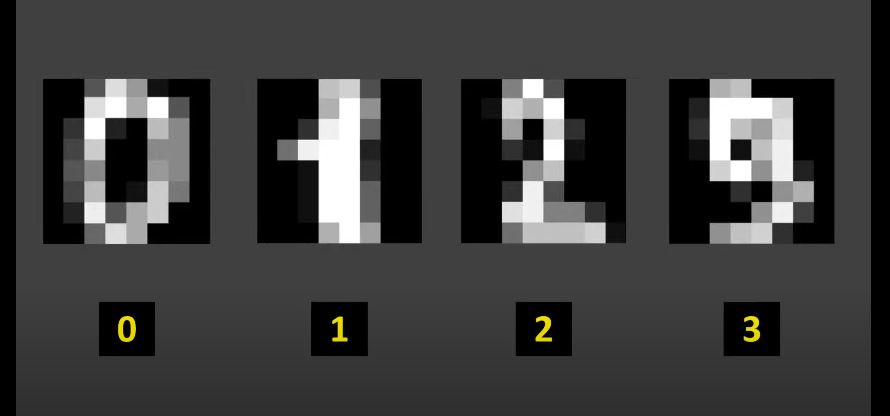

We are working on a handwritten digit classification, where we have digits which are written by hand and then you try to classify as one of the numbers from 0-9

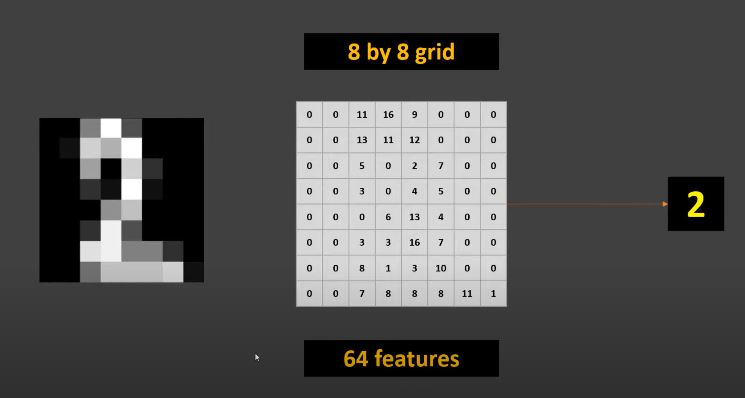

Here this image is represeneted as pixels, lets assume this is a grid of 8 by 8 and every numbers present the color, so 0 means black and 16 means highest i-e white. Since its an 8 by 8 grid there are total 64 total pixels or numbers that helps to determine what number it is. So this 64 pixels are called features.

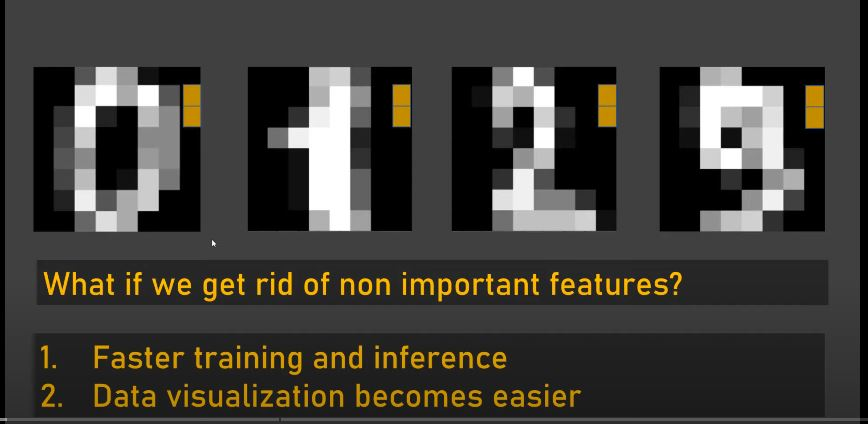

Now if we think about some of the pixels in these images, we will find that those pixels dont play any roll at all in figuring what digit it is. For example these 2 pixels as shown on digit blocks by orange color, no matter what number it is these pixels are always black so we can say that these pixels are not important features and what if get rid of these features? Then we get 2 benefits:
1. The first is that training is faster, we know that ML training takes alot of time and lot of computer resources, so we want to save the training and make it a little light weight and our inference can also be faster.
2. Second is that data visualization becomes easier, lets say we have 100 features and somehow we reduce those 100 features into only 2 or 3 features then as a human we can plot it on a 2D or a 3D graph and can visualize it and data visualization helps alot interms of final decision making with regards to what kind of model we want to build.

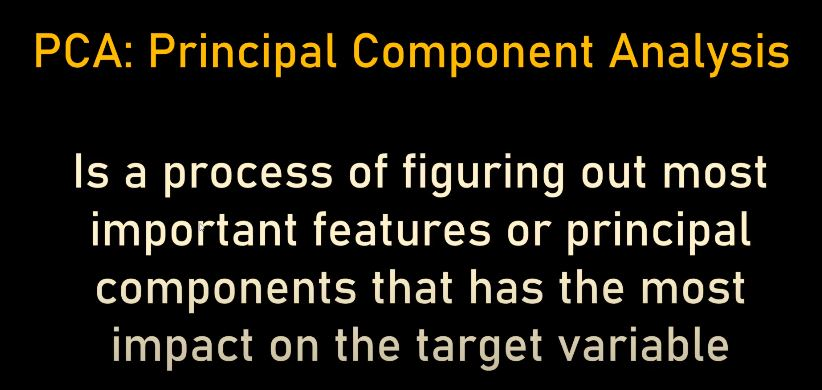

PCA will create the new feature called principle component i-e PC1, PC2.

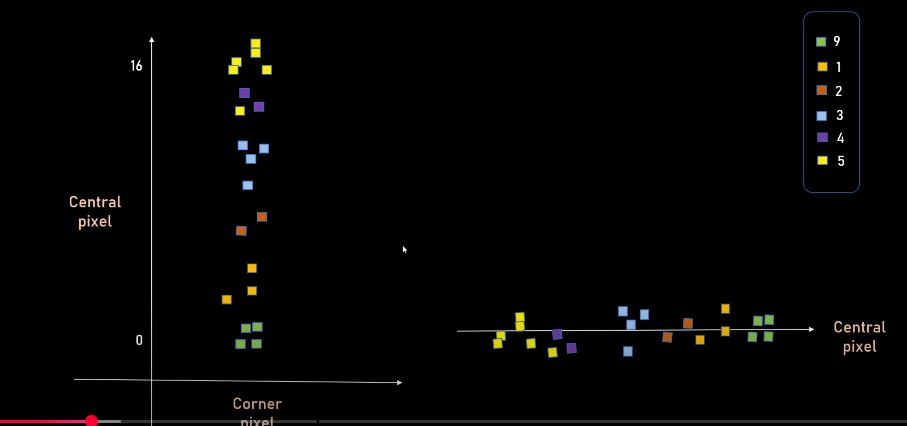

In digits examples, lets assume we have 64 features out of that we are plotting only 2 features i-e corner pixels and central pixels, now here these cluster represents different digits, and we immediately notice that the corner pixel is not playing an important role. Maximum variation is on the Y-Axis or maximum variance is on y_axis which is central pixel, so if i ask it to reduce this 2D into 1D, we can easily do so by getting rid of corner pixels. So that graph on the right hand side that is 1D.

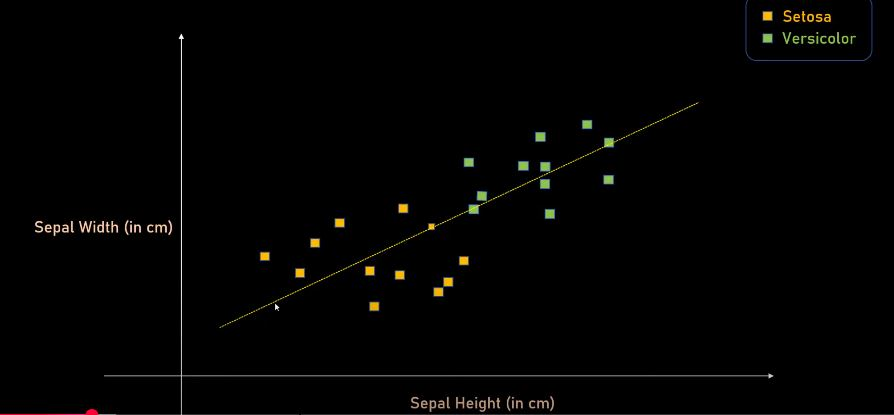